# Predicting Loan Repayment-Jayithi Gavva


The dataset for this project is retrieved from kaggle, the home of Data Science.

The major aim of this project is to predict whether the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained.

### **1- Importing Libraries**

In [213]:
# Import the following Libraries
#numpy
#pandas
# matplotlib plotting software
# seaborn 
# Make matplotlib available through all code boxes

# From Sklearn you'll have to look up from where here. 
# Label Encoder, train test split, logisitic regression, confusion_matrix, classification_report,accuracy_score
# DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier,  SVC, GridSearchCV

# Plotly Express

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.express as px

### **2- Getting Data**

In [214]:
# read the data from the csv into a dataframe

df = pd.read_csv("C:\\Users\\Tanish Reddy\\Desktop\\gooddatatset.csv")

In [215]:
# show the top 4 lines of the dataframe
print(df.head(4))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   

   Applicant_Income  CoapplicantIncome  Loan_Amount  Loan_Amount_Term  \
0              5849                0.0          NaN             360.0   
1              4583             1508.0        128.0             360.0   
2              3000                0.0         66.0             360.0   
3              2583             2358.0        120.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  


In [216]:
# show the shape of the dataframe
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (614, 13)


##### 2-1-Renaming columns

In [217]:
# rename all the columns as lowercase strings

df.columns = df.columns.str.lower()
print(df.head())

    loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   applicant_income  coapplicantincome  loan_amount  loan_amount_term  \
0              5849                0.0          NaN             360.0   
1              4583             1508.0        128.0             360.0   
2              3000                0.0         66.0             360.0   
3              2583             2358.0        120.0             360.0   
4              6000                0.0        141.0             360.0   

   credit_history property_area loan_status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2       

In [218]:
# rename all the columns so that they all have _ in between any column head with two or more words
df.columns = df.columns.str.replace(' ', '_')
print(df.head())


    loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   applicant_income  coapplicantincome  loan_amount  loan_amount_term  \
0              5849                0.0          NaN             360.0   
1              4583             1508.0        128.0             360.0   
2              3000                0.0         66.0             360.0   
3              2583             2358.0        120.0             360.0   
4              6000                0.0        141.0             360.0   

   credit_history property_area loan_status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2       

##### 2-2-Checking null values

In [219]:
# Check all the columns to see if they have null values (NaN) and sum them
null_values_sum = df.isnull().sum()
print(null_values_sum)

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicant_income      0
coapplicantincome     0
loan_amount          22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


we take care of missing values in "loan_amount" and "credit_history".
For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

In [220]:
# fill the null values in the loan amount column with the mean of the loan amount  column
df['loan_amount']=df['loan_amount'].fillna(df['loan_amount'].mean())   
print(df.head())


    loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   applicant_income  coapplicantincome  loan_amount  loan_amount_term  \
0              5849                0.0   146.412162             360.0   
1              4583             1508.0   128.000000             360.0   
2              3000                0.0    66.000000             360.0   
3              2583             2358.0   120.000000             360.0   
4              6000                0.0   141.000000             360.0   

   credit_history property_area loan_status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2       

In [221]:
# fill the null values in the  credit history column with the median of the credit history column
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].median())
print(df.head())

    loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   applicant_income  coapplicantincome  loan_amount  loan_amount_term  \
0              5849                0.0   146.412162             360.0   
1              4583             1508.0   128.000000             360.0   
2              3000                0.0    66.000000             360.0   
3              2583             2358.0   120.000000             360.0   
4              6000                0.0   141.000000             360.0   

   credit_history property_area loan_status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2       

In [222]:
df.dropna(axis=0, inplace=True)

# write down what this code does
#This code cleans the DataFrame by removing any rows with missing data, ensuring that only complete rows remain.

In [223]:
# prove there are no more null values in the columns using the same command as above
null_values_sum = df.isnull().sum()
print(null_values_sum)

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicant_income     0
coapplicantincome    0
loan_amount          0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [224]:
# show the top 4 lines of the dataframe
print(df.head(4))

    loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   

   applicant_income  coapplicantincome  loan_amount  loan_amount_term  \
0              5849                0.0   146.412162             360.0   
1              4583             1508.0   128.000000             360.0   
2              3000                0.0    66.000000             360.0   
3              2583             2358.0   120.000000             360.0   

   credit_history property_area loan_status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  


In [225]:
# show the new shape of the dataframe
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (542, 13)


In [226]:
# show the information/ statistics on this dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            542 non-null    object 
 1   gender             542 non-null    object 
 2   married            542 non-null    object 
 3   dependents         542 non-null    object 
 4   education          542 non-null    object 
 5   self_employed      542 non-null    object 
 6   applicant_income   542 non-null    int64  
 7   coapplicantincome  542 non-null    float64
 8   loan_amount        542 non-null    float64
 9   loan_amount_term   542 non-null    float64
 10  credit_history     542 non-null    float64
 11  property_area      542 non-null    object 
 12  loan_status        542 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB
None


In [227]:
# get statiscal information on the data frame like count/mean/standard deviation etc
print(df.describe())

       applicant_income  coapplicantincome  loan_amount  loan_amount_term  \
count        542.000000         542.000000   542.000000        542.000000   
mean        5291.911439        1590.699114   145.518139        341.955720   
std         5506.461371        2543.801628    81.749385         65.441582   
min          150.000000           0.000000     9.000000         12.000000   
25%         2843.750000           0.000000   100.000000        360.000000   
50%         3848.000000        1149.000000   129.500000        360.000000   
75%         5820.500000        2281.000000   167.750000        360.000000   
max        81000.000000       33837.000000   650.000000        480.000000   

       credit_history  
count      542.000000  
mean         0.863469  
std          0.343669  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


##### 2-3-Label Encoder for Dependents

In [228]:
type(df['dependents'].iloc[0])

str

In [229]:
df['dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [230]:
model6=LabelEncoder()

In [231]:
model6.fit(df['dependents'])

LabelEncoder()

In [232]:
df['dependents']= model6.transform(df['dependents'])

Explain what they are doing in this section

1. **`type(df['dependents'].iloc[0])`**: Checks the data type of the first entry in the `'dependents'` column.

2. **`df['dependents'].unique()`**: Lists unique values in the `'dependents'` column.

3. **`model6 = LabelEncoder()`**: Creates a `LabelEncoder` instance for encoding categorical data.

4. **`model6.fit(df['dependents'])`**: Fits the encoder to the unique values in the `'dependents'` column.

5. **`df['dependents'] = model6.transform(df['dependents'])`**: Transforms the categorical values in the `'dependents'` column to numerical values.

### 3-Exploratory Data Analysis

##### 3-1- Visualization

In [233]:
# get the counts of Loan statuses with "Y" in the column
count_y = df['loan_status'].value_counts().get('Y', 0)
print("Count of 'Y' in 'Loan Status':", count_y)

Count of 'Y' in 'Loan Status': 376


In [234]:
# get the counts of Loan statuses with "N" in the column
count_n = df['loan_status'].value_counts().get('N', 0)
print("Count of 'N' in 'loan_status':", count_n)

Count of 'N' in 'loan_status': 166


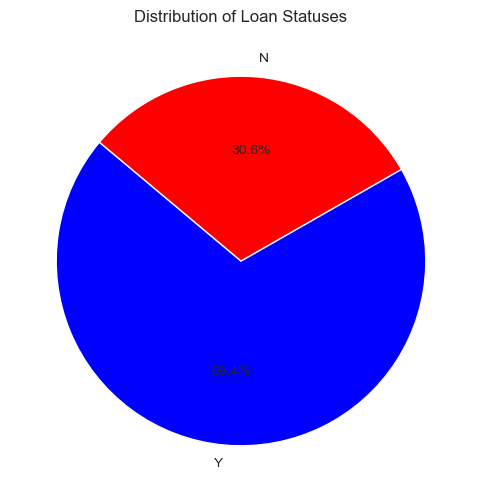

In [235]:
# make a pie plot that shows the distrubution of Y loans and N loans
# this plot should have a title, different colors, the percentages inside the sections 
labels = ['Y', 'N']
sizes = [count_y, count_n]
colors = ['Blue', 'Red']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Statuses')
plt.show()

69.4% of applicants repay the loan and 30.6% do not repay the loan.

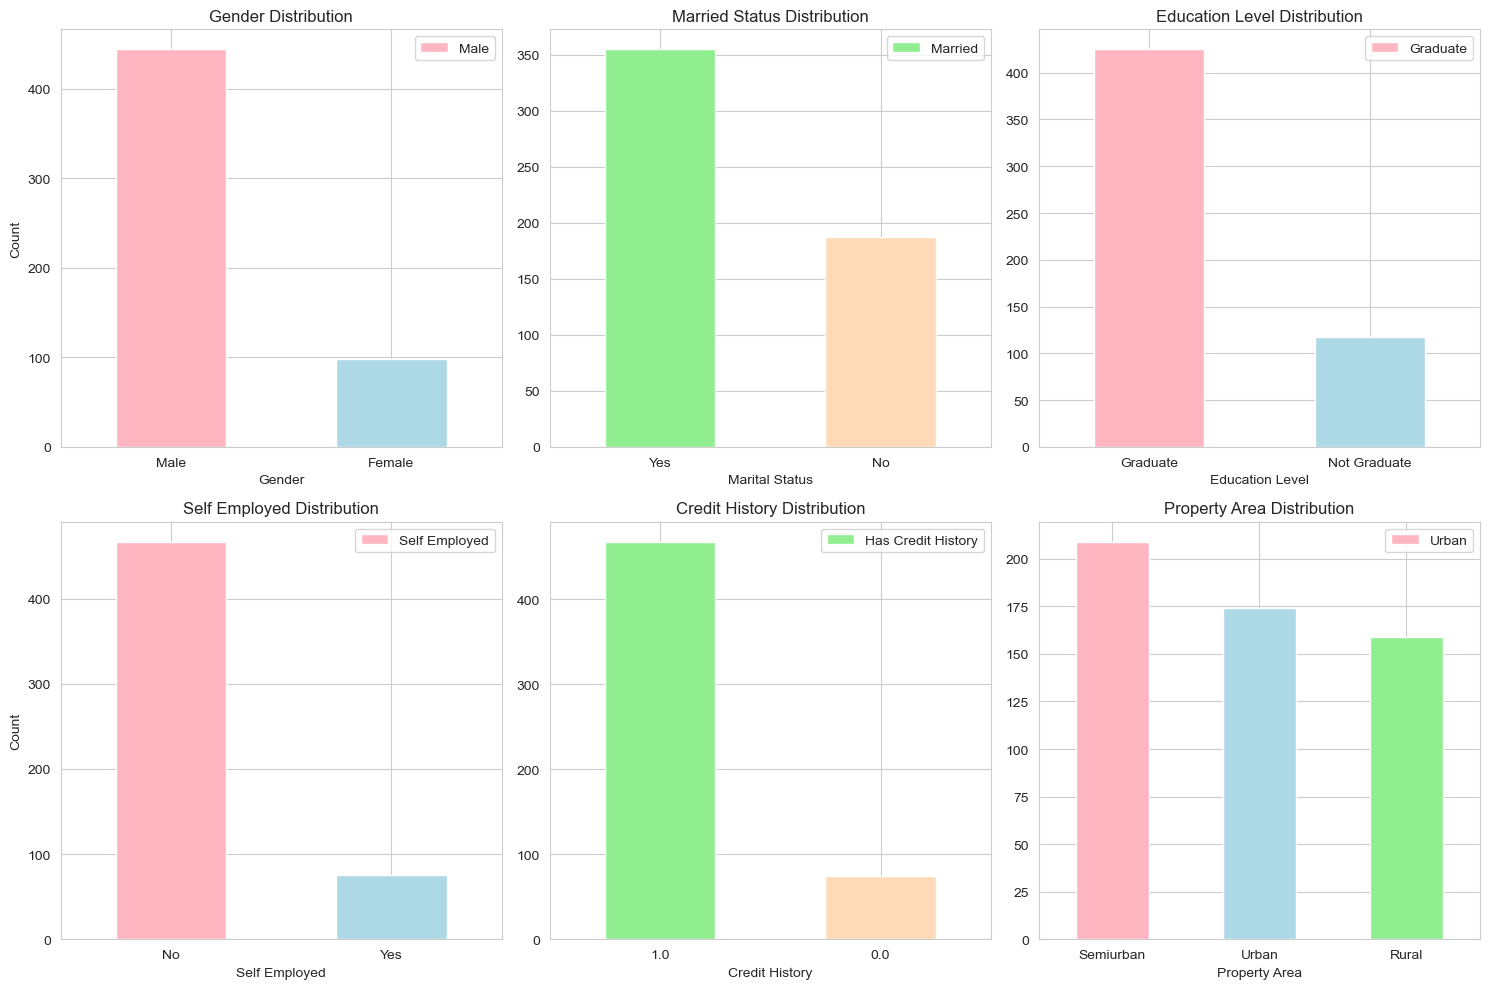

In [236]:
# make six bar charts that create the basica comparisons listed below
# each should have legends, and as different colors as possible.
# Plots 1 and 4 should have y labels and ticks while the rest of them should not
# Data for each plot
plot_data = {
    'Gender Distribution': df['gender'].value_counts(),
    'Married Status Distribution': df['married'].value_counts(),
    'Education Level Distribution': df['education'].value_counts(),
    'Self Employed Distribution': df['self_employed'].value_counts(),
    'Credit History Distribution': df['credit_history'].value_counts(),
    'Property Area Distribution': df['property_area'].value_counts()
}

# Create a figure and subplots
plt.figure(figsize=(15, 10))

# Plot 1: Gender Distribution
plt.subplot(2, 3, 1)
plot_data['Gender Distribution'].plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Male', 'Female'], loc='best')

# Plot 2: Married Status Distribution
plt.subplot(2, 3, 2)
plot_data['Married Status Distribution'].plot(kind='bar', color=['lightgreen', 'peachpuff'])
plt.title('Married Status Distribution')
plt.xlabel('Marital Status')
plt.xticks(rotation=0)
plt.legend(['Married', 'Not Married'], loc='best')

# Plot 3: Education Level Distribution
plt.subplot(2, 3, 3)
plot_data['Education Level Distribution'].plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.legend(['Graduate', 'Not Graduate'], loc='best')

# Plot 4: Self Employed Distribution
plt.subplot(2, 3, 4)
plot_data['Self Employed Distribution'].plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title('Self Employed Distribution')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Self Employed', 'Not Self Employed'], loc='best')

# Plot 5: Credit History Distribution
plt.subplot(2, 3, 5)
plot_data['Credit History Distribution'].plot(kind='bar', color=['lightgreen', 'peachpuff'])
plt.title('Credit History Distribution')
plt.xlabel('Credit History')
plt.xticks(rotation=0)
plt.legend(['Has Credit History', 'No Credit History'], loc='best')

# Plot 6: Property Area Distribution
plt.subplot(2, 3, 6)
plot_data['Property Area Distribution'].plot(kind='bar', color=['lightpink', 'lightblue', 'lightgreen'])
plt.title('Property Area Distribution')
plt.xlabel('Property Area')
plt.xticks(rotation=0)
plt.legend(['Urban', 'Semiurban', 'Rural'], loc='best')

# Adjust layout and display
plt.tight_layout()
plt.show()



Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.
   
Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.
    
Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.
    
Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan.

In [237]:
fig = px.sunburst( data_frame=df,path=['gender','loan_status'], color='loan_amount')

fig.update_traces(textinfo='label+percent entry', insidetextorientation='horizontal')
fig.show()

# try this code to see if it works. Can you fix it
#I don't see anything wrong with the plot except for the labels, I have fixed that. I also added the percentage display

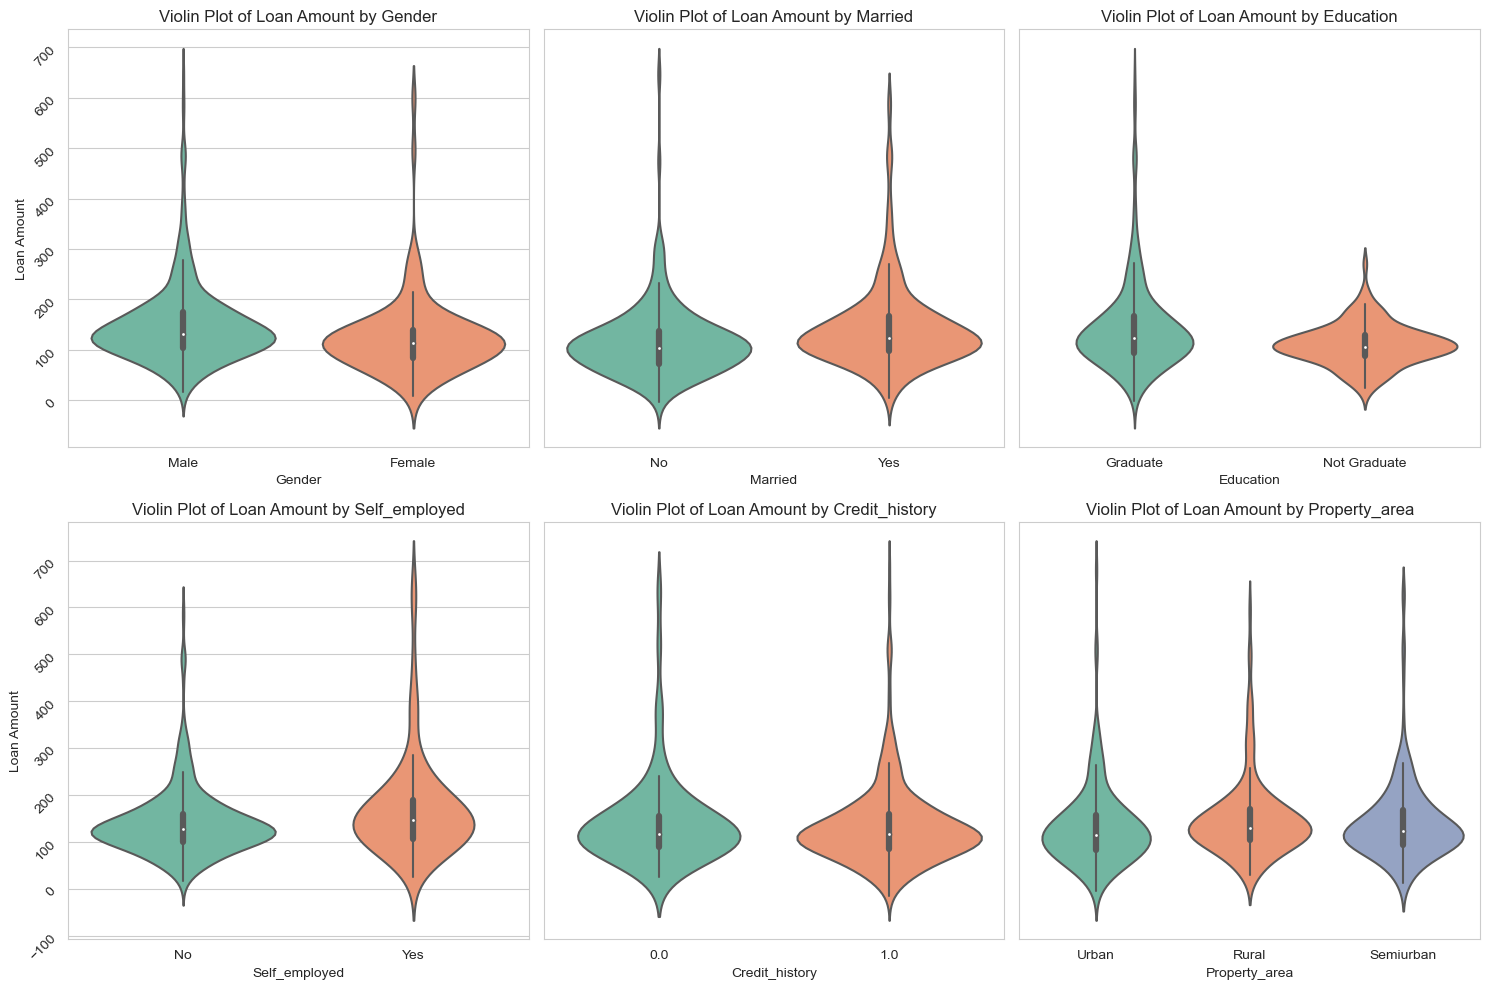

In [238]:
# create violin plots that have the six features shown above in the x value and loan amount in the y value
# Plots 1 and 4 should have y labels and ticks while the rest of them should not

# Create a figure and subplots
plt.figure(figsize=(15,10))

# Features to plot
features = ['gender', 'married', 'education', 'self_employed', 'credit_history', 'property_area']

# Create the violin plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=df[feature], y=df['loan_amount'], palette='Set2')
    
    plt.title(f'Violin Plot of Loan Amount by {feature.capitalize()}')
    
    # Set y-label and ticks for Plot 1 and Plot 4
    if i in [1, 4]:
        plt.ylabel('Loan Amount')
        plt.yticks(rotation=45)
    else:
        plt.ylabel('')
        plt.yticks([])

    # Set x-label for all plots
    plt.xlabel(feature.capitalize())

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<Figure size 1800x500 with 0 Axes>

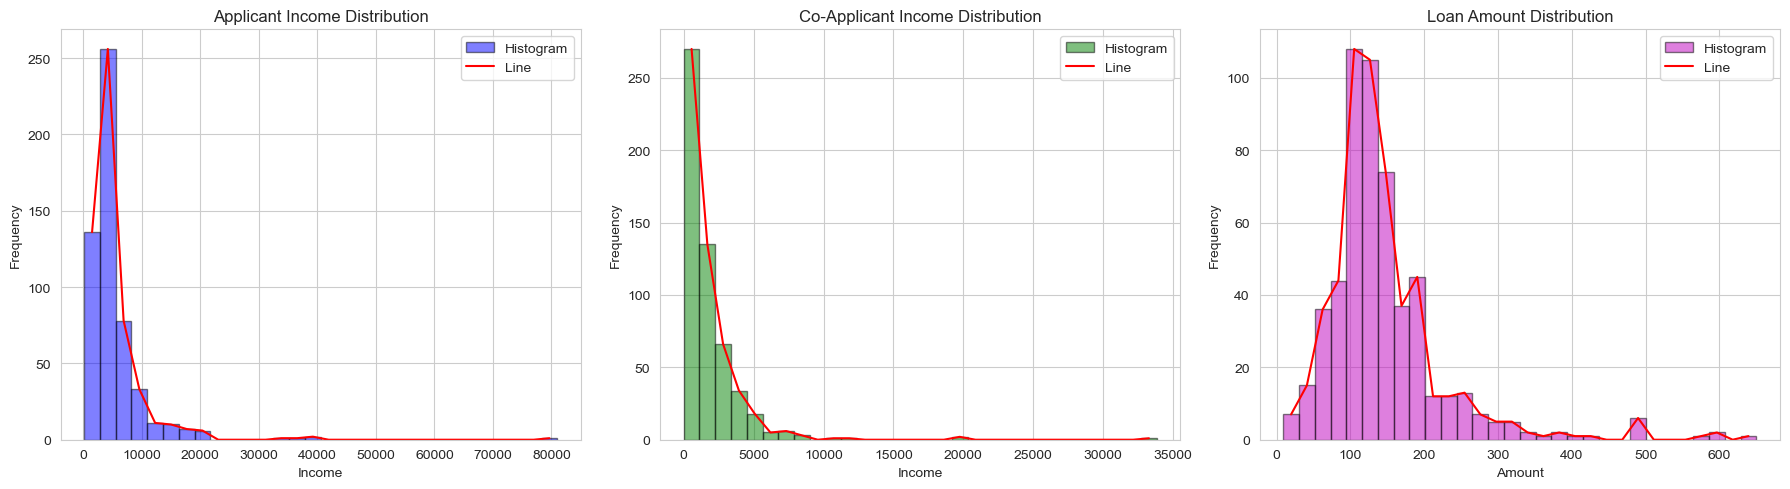

In [239]:
plt.figure(figsize=(18,5))

# Make three subplots that show frequency distributions of applicant incomes, co-applicant incomes and loan amounts
# these should have lines and bars
import matplotlib.pyplot as plt

# Create a figure and subplots
plt.figure(figsize=(18,5))

# Define a function to plot histogram and line
def plot_histogram(ax, data, color, title, xlabel):
    # Plot histogram
    ax.hist(data, bins=30, alpha=0.5, color=color, edgecolor='black', label='Histogram')
    
    # Plot line
    counts, bin_edges = np.histogram(data, bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax.plot(bin_centers, counts, color='r', label='Line')
    
    # Set title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.legend()

# Subplots
plot_histogram(plt.subplot(1, 3, 1), df['applicant_income'], 'b', 'Applicant Income Distribution', 'Income')
plot_histogram(plt.subplot(1, 3, 2), df['coapplicantincome'], 'g', 'Co-Applicant Income Distribution', 'Income')
plot_histogram(plt.subplot(1, 3, 3), df['loan_amount'], 'm', 'Loan Amount Distribution', 'Amount')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [240]:
# px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

# try this command and see if it works


# Create a 3D scatter plot
fig = px.scatter_3d(data_frame=df,x='applicant_income',y='coapplicantincome',z='loan_amount',color='loan_status'
)

# Show the plot
fig.show()


##### 3-2-Encoding

###### 3-2-1-gender

In [241]:
model1=LabelEncoder()

In [242]:
model1.fit(df['gender'])

LabelEncoder()

In [243]:
df['gender']= model1.transform(df['gender'])

###### 3-2-2-married

In [244]:
model2=LabelEncoder()

In [245]:
model2.fit(df['married'])

LabelEncoder()

In [246]:
df['married']= model2.transform(df['married'])

###### 3-2-3-education

In [247]:
model3=LabelEncoder()

In [248]:
model3.fit(df['education'])

LabelEncoder()

In [249]:
df['education']= model3.transform(df['education'])

###### 3-2-4-self_employed

In [250]:
model4=LabelEncoder()

In [251]:
model4.fit(df['self_employed'])

LabelEncoder()

In [252]:
df['self_employed']= model4.transform(df['self_employed'])

###### 3-2-5-property_area

In [253]:
model5=LabelEncoder()

In [254]:
model5.fit(df['property_area'])

LabelEncoder()

In [255]:
df['property_area']= model5.transform(df['property_area'])

###### 3-2-6-loan status

In [256]:
model6=LabelEncoder()

In [257]:
model6.fit(df['loan_status'])

LabelEncoder()

In [258]:
df['loan_status']= model6.transform(df['loan_status'])

In [259]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicantincome,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


c:\Users\Tanish Reddy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

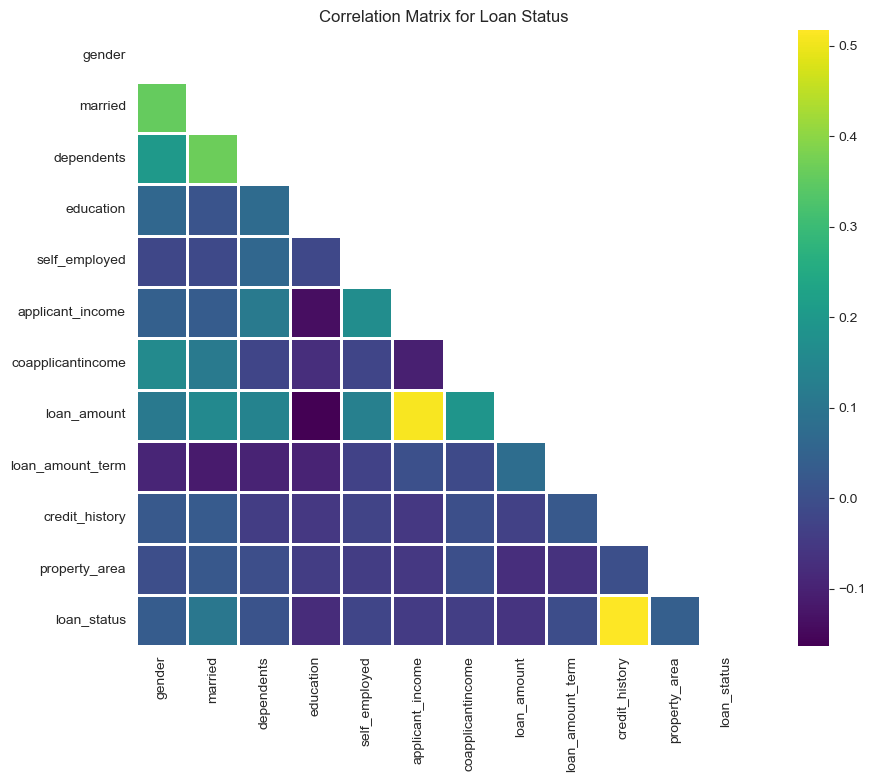

In [260]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()#L1
mask = np.zeros_like(corr) #L2
mask[np.triu_indices_from(mask)] = True #L3
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

**Explain what the encoder does here**
The LabelEncoder is used to convert categorical text data into numerical labels. This is necessary because many machine learning algorithms require numerical input. It initializes and fits the encoder and then transforms the data. For example, if the column gender had the categories 'Male' and 'Female', they might be converted to 1 and 0 respectively.

**Explain what this plot would do if it did not include L1, L2, L3**


*L1-*The correlation matrix would not be calculated, so there would be no data to plot.


*L2-*Excluding L2 means the mask array is not initialized to zeros. This causes the mask setup in L3 to fail, resulting in the full correlation matrix being displayed without any masking.


*L3-*Excluding L3 means the upper triangle of the correlation matrix will not be masked out. This results in displaying the full, symmetric correlation matrix, showing all the information.

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.
This high correlation indicates that whether an applicant has a credit history impacts on their loan status or not. In other words, the likelihood of a loan being approved is strongly dependent on the credit history of a person."

### 4-Prediction

##### 4-1-LogisticRegression

In [261]:
# Set a variable equal to the dataframe that has dropped the columns loan_id, and loan_status
# Hint: might want to control axis
# set 2nd variable equal to the dataframe with a singular feature loan status
df_features = df.drop(columns=['loan_id', 'loan_status'], axis=1)
df_target = df[['loan_status']]


In [262]:
# Perform a train test split
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)
print(X_train.shape,  X_test.shape, Y_train.shape, Y_test.shape)


(433, 11) (109, 11) (433, 1) (109, 1)


In [263]:
# set a variable equal to a logistic regression model
model = LogisticRegression()

In [264]:
Y_train = np.ravel(Y_train.values)
Y_test = np.ravel(Y_test.values)

In [265]:
# fit your model to the training set
model.fit(X_train, Y_train)

LogisticRegression()

In [266]:
# set a variable to the logistic regression prediction of the test set
# basically if your variables were X and y the use logistic regression to predict X-test
lr_prediction = model.predict(X_test)

In [267]:
print(confusion_matrix(Y_test,lr_prediction))

# Explain confusion matrix


print('\n')
print(classification_report(Y_test,lr_prediction))

# Explain classification report

print('\n')
print('Logistic Regression accuracy: ', accuracy_score(Y_test,lr_prediction))

# Do you feel like this is an accurate model?

[[15 18]
 [ 4 72]]


              precision    recall  f1-score   support

           0       0.79      0.45      0.58        33
           1       0.80      0.95      0.87        76

    accuracy                           0.80       109
   macro avg       0.79      0.70      0.72       109
weighted avg       0.80      0.80      0.78       109



Logistic Regression accuracy:  0.7981651376146789


# 4-2-More models

### Decision Tree Classifier

In [268]:
# Use this Decision Tree Classifier Model to complete the same thing on 

# Random Forest Classifier
# K Nearest Neighbors
# SVC


In [269]:
dt=DecisionTreeClassifier()

In [270]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [271]:
dt_prediction=dt.predict(X_test)

In [272]:
# Confusion Matrix and Model Accuracy

print(confusion_matrix(Y_test,dt_prediction))
print('\n')
print(classification_report(Y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(Y_test,dt_prediction))

[[19 14]
 [19 57]]


              precision    recall  f1-score   support

           0       0.50      0.58      0.54        33
           1       0.80      0.75      0.78        76

    accuracy                           0.70       109
   macro avg       0.65      0.66      0.66       109
weighted avg       0.71      0.70      0.70       109



Decision Tree Accuracy:  0.6972477064220184


##### 4-3-Random Forest

In [273]:
# Box for model
rf=RandomForestClassifier()

In [274]:
# Box for fit

rf.fit(X_train, Y_train)

RandomForestClassifier()

In [275]:
# Box for prediction

rf_prediction = model.predict(X_test)


In [276]:
# Box for Confusion Matrix and Model Accuracy
print(confusion_matrix(Y_test,rf_prediction))
print('\n')
print(classification_report(Y_test,rf_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(Y_test,rf_prediction))

[[15 18]
 [ 4 72]]


              precision    recall  f1-score   support

           0       0.79      0.45      0.58        33
           1       0.80      0.95      0.87        76

    accuracy                           0.80       109
   macro avg       0.79      0.70      0.72       109
weighted avg       0.80      0.80      0.78       109



Random Forest Accuracy:  0.7981651376146789


##### 4-4-KNearest Neighbors

In [277]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=Y_test))
print(error_rate)

[0.3669724770642202, 0.41284403669724773, 0.3577981651376147, 0.3761467889908257, 0.3394495412844037, 0.3394495412844037, 0.3211009174311927, 0.3486238532110092, 0.29357798165137616, 0.3394495412844037, 0.29357798165137616, 0.30275229357798167, 0.29357798165137616, 0.30275229357798167, 0.30275229357798167, 0.28440366972477066, 0.29357798165137616, 0.30275229357798167, 0.30275229357798167, 0.28440366972477066, 0.30275229357798167, 0.30275229357798167, 0.28440366972477066, 0.27522935779816515, 0.28440366972477066, 0.27522935779816515, 0.30275229357798167, 0.27522935779816515, 0.29357798165137616, 0.29357798165137616, 0.30275229357798167, 0.30275229357798167, 0.30275229357798167, 0.30275229357798167, 0.30275229357798167, 0.30275229357798167, 0.30275229357798167, 0.30275229357798167, 0.30275229357798167]


Text(0.5, 1.0, 'Elbow Method')

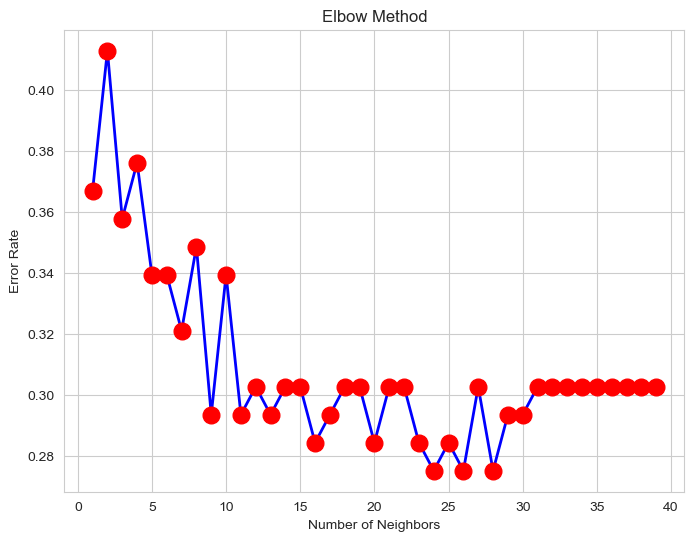

In [278]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [279]:
# Run the above two boxes to get the number of necessary nearest neighbors
# Please look up what would tell you what number to use from this 
# Find the index of the minimum error rate
optimal_n_neighbors = error_rate.index(min(error_rate)) + 1
print("Optimal number of neighbors:", optimal_n_neighbors)


Optimal number of neighbors: 24


In [280]:
# Get Number from above cells

knn=KNeighborsClassifier(n_neighbors=7)

In [281]:
# Box for fitting 
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [282]:
# Box for predictions
knn_prediction = model.predict(X_test)

In [283]:
# Box for Confusion Matrix and Model Accuracy
print(confusion_matrix(Y_test,knn_prediction))
print('\n')
print(classification_report(Y_test,knn_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(Y_test,knn_prediction))

[[15 18]
 [ 4 72]]


              precision    recall  f1-score   support

           0       0.79      0.45      0.58        33
           1       0.80      0.95      0.87        76

    accuracy                           0.80       109
   macro avg       0.79      0.70      0.72       109
weighted avg       0.80      0.80      0.78       109



Random Forest Accuracy:  0.7981651376146789


##### 4-5-SVC

In [284]:
# Box for model
svc=SVC()

In [285]:
# Box for fitting 
svc.fit(X_train,Y_train)


SVC()

In [286]:
# Box for predicting
svc_prediction=dt.predict(X_test)

In [287]:
# Box for Confusion Matrix and Model Accuracy
# Box for Confusion Matrix and Model Accuracy
print(confusion_matrix(Y_test,svc_prediction))
print('\n')
print(classification_report(Y_test,svc_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(Y_test,svc_prediction))

[[19 14]
 [19 57]]


              precision    recall  f1-score   support

           0       0.50      0.58      0.54        33
           1       0.80      0.75      0.78        76

    accuracy                           0.70       109
   macro avg       0.65      0.66      0.66       109
weighted avg       0.71      0.70      0.70       109



Random Forest Accuracy:  0.6972477064220184


In [288]:
# Using the example for logistic regression please print the accuracy scores for the 5 models you used.
# Please Let me know you conclusions in the last box. 
# one about the data
# the second about which model is best

print('Logistic Regression Accuracy: ', accuracy_score(Y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(Y_test, dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(Y_test, rf_prediction))
print('K Nearest Neighbours 4 Accuracy: ', accuracy_score(Y_test, knn_prediction))
print('SVC Accuracy: ', accuracy_score(Y_test, svc_prediction))


Logistic Regression Accuracy:  0.7981651376146789
Decision Tree Accuracy:  0.6972477064220184
Random Forest Accuracy:  0.7981651376146789
K Nearest Neighbours 4 Accuracy:  0.7981651376146789
SVC Accuracy:  0.6972477064220184


### CONCLUSION

1. Tell me what you learned from the data


The data is good for classification because several models are getting high accuracy. This means the features in the data are probably good at helping to tell the different classes apart.

2. Which model is best and why?:

Logistic Regression, Random Forest, and K Nearest Neighbours all achieved the highest accuracy of 0.83. Since they all performed equally well in terms of accuracy, we can choose what best suits our needs.